In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [33]:
start = '2012-01-01'
end = '2024-05-07'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [34]:
data.reset_index(inplace=True)

In [35]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
3100,2024-04-30,167.380005,169.869995,164.500000,164.639999,164.452866,29420800
3101,2024-05-01,166.179993,168.809998,164.899994,165.570007,165.381805,25223200
3102,2024-05-02,166.669998,168.529999,165.690002,168.460007,168.268524,17041100
3103,2024-05-03,169.539993,169.850006,164.979996,168.990005,168.797928,22767100


In [36]:
ma_100_days = data.Close.rolling(100).mean()

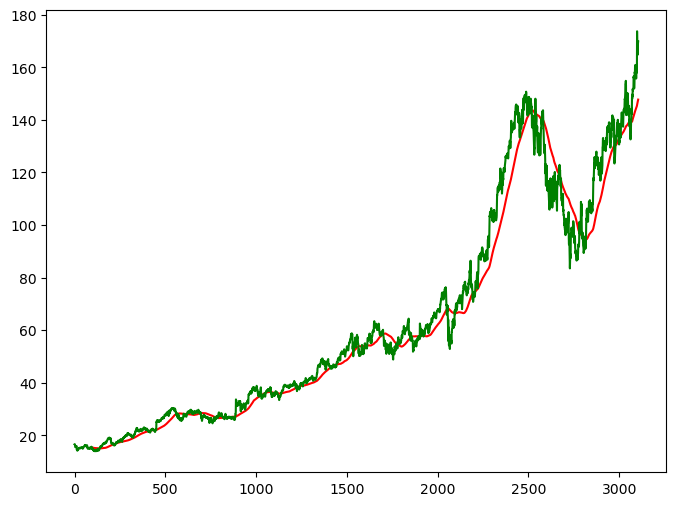

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [38]:
ma_200_days = data.Close.rolling(200).mean()

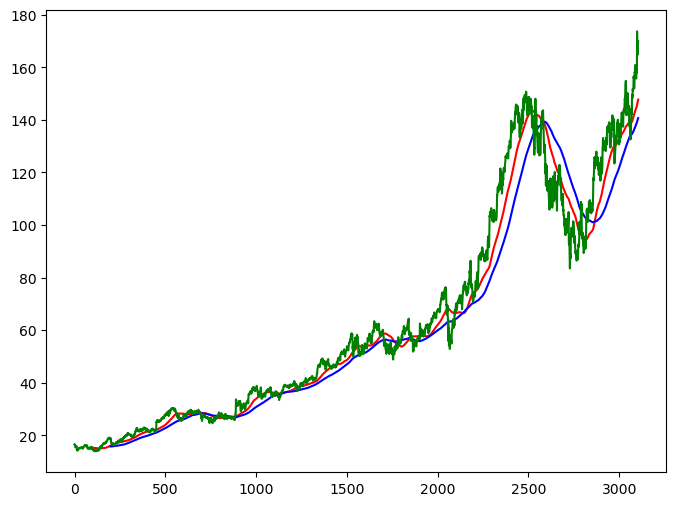

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [40]:
data.dropna(inplace=True)

In [41]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [42]:
data_train.shape[0]

2484

In [43]:
data_test.shape[0]

621

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [45]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\vishn\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 218ms/step - loss: 0.0432
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - loss: 0.0046
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - loss: 0.0043
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step - loss: 0.0040
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - loss: 0.0029
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - loss: 0.0032
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - loss: 0.0030
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - loss: 0.0027
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - loss: 0.0026
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - loss: 0.0024
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - loss: 0.0025
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - loss: 0.0023
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - loss: 0.0024
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0022
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
pas_100_days = data_train.tail(100)

In [54]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [55]:
data_test_scale  =  scaler.fit_transform(data_test)

In [56]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step


In [58]:
scale =1/scaler.scale_

In [59]:
y_predict = y_predict*scale

In [60]:
y = y*scale

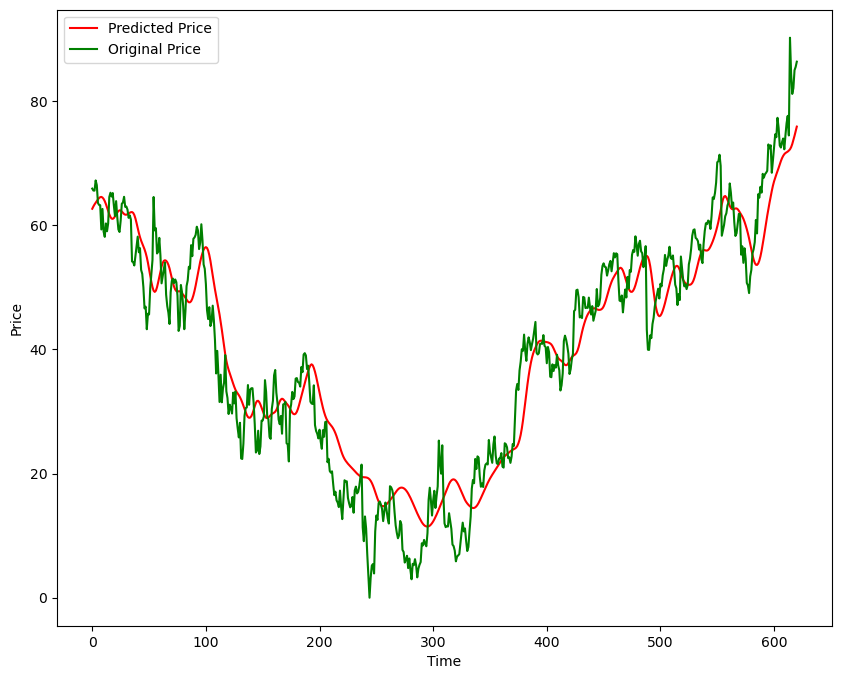

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
model.save('Stock Predictions Model.keras')